# Getting Started With Exploratory Data Analysis (EDA)

This notebook serves as a starter guide or template for exploratory data analysis.

### Fetch necessary library

In [50]:
# Libraries to fetch

import os
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary


The dataset we will be using today consists of publicly available PDF documents outlining the policies of Boston Public Schools.


Link: https://www.bostonpublicschools.org/domain/1884

### Basic functions

In [51]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [87]:


# Function to load all text files from a directory
def load_all_text_files(directory):
    file_texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                file_texts.append(file.read())
    return file_texts

# Function to load text from a file
def load_text_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Plot Word Cloud for frequent words
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# LDA Topic Modeling
def apply_lda(texts, num_topics=5, num_words=5):
    # Tokenize the text for LDA
    tokenized_texts = [tokenize_and_lemmatize_text(text) for text in texts]
    
    # Create a dictionary and corpus for LDA
    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    # Print topics
    topics = lda_model.print_topics(num_words=num_words)
    for idx, topic in topics:
        print(f"Topic {idx+1}: {topic}")

# Tokenization using spaCy
def tokenize_and_lemmatize_text(text):
    nlp.max_length = 3_000_000
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop and token.text not in ['•', '• ', '◦', '●']]
    return tokens

# Word count and frequency analysis
def word_count_analysis(tokens):
    word_freq = Counter(tokens)
    word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Count'])
    word_freq_df.sort_values(by='Count', ascending=False, inplace=True)
    return word_freq_df

# Calculate TF-IDF
def calculate_tfidf(corpus):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    return tfidf_df

# Function to plot histogram of top 10 frequent words
def plot_word_histogram(word_freq_df):
    # Select top 10 frequent words
    top_10 = word_freq_df.head(10)
    
    # Create a histogram
    plt.figure(figsize=(10,6))
    plt.bar(top_10['Word'], top_10['Count'], color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Frequent Words')
    plt.xticks(rotation=45)
    plt.show()

def plot_word_count_histogram(texts):
    # Calculate word counts for each document
    word_counts = [len(text.split()) for text in texts]  # Split text into words and count

    # Create the histogram
    plt.hist(word_counts, bins=20, color='blue', edgecolor='black')  # You can adjust the number of bins

    # Set labels and title
    plt.xlabel('Word Count per Document')
    plt.ylabel('Number of Documents')
    plt.title('Histogram of Word Counts per Document')
    
    # Show the plot
    plt.show()


### Functions to save tokenized corpus

In [74]:
# Save tokenized text to a file
def save_tokenized_text(tokens, filepath):
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write(' '.join(tokens))  # Saving as space-separated tokens


# Load tokenized text from a file
def load_tokenized_text(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    return text.split()  # Returning as a list of tokens


def main(directory, tokenized_output_path):
    # Load all text files from the directory
    texts = load_all_text_files(directory)

    # Tokenize and lemmatize the text
    tokens = []
    for text in texts:
        tokens += tokenize_and_lemmatize_text(text)
    
    # Save the tokenized text to a file
    save_tokenized_text(tokens, tokenized_output_path)
    
    print(f"Tokenized text saved to {tokenized_output_path}")

    # Load the tokenized text from the file (merged corpus)
    merged_tokens = load_tokenized_text(tokenized_output_path)
    
    # Proceed with further analysis on merged_tokens as needed
    print(f"Loaded {len(merged_tokens)} tokens for analysis")


directory_path = "../data/data_txt/"
tokenized_output_path = "../data/data_txt/tokenized_data/tokenized_text.txt"

main(directory_path, tokenized_output_path)


Tokenized text saved to ../data/data_txt/tokenized_data/tokenized_text.txt
Loaded 232242 tokens for analysis


### Main function

Total number of words after tokenization and lemmatization: 232242


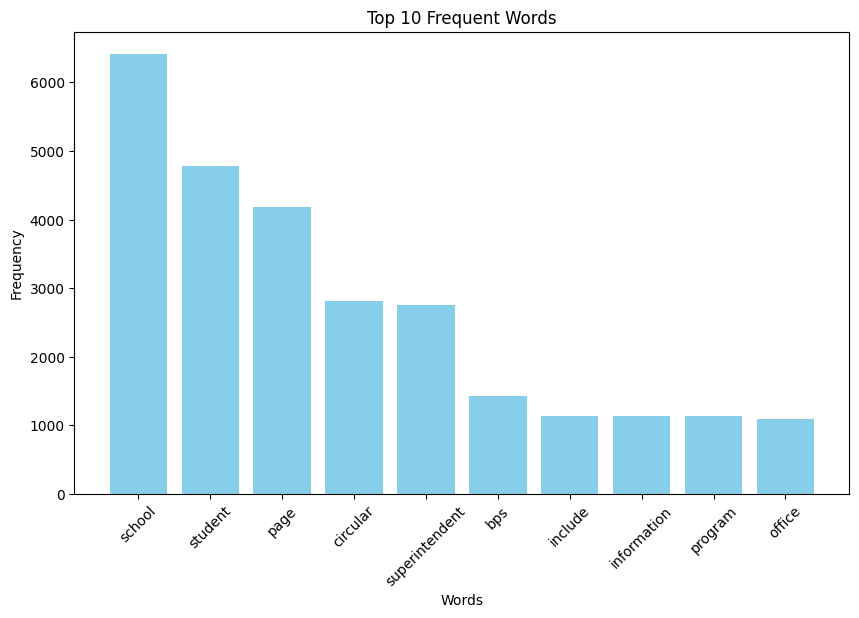

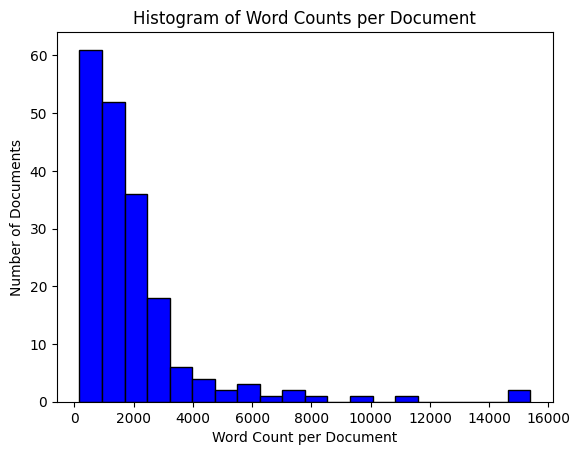


TF-IDF Scores (Top 10 words):
                       0
school          0.521059
student         0.387545
page            0.338063
circular        0.227151
superintendent  0.222873
bps             0.115351
department      0.093476
include         0.091377
information     0.091377
program         0.091377
Total number of files: 190
Average word count per file: 9266.252631578947
Generating Word Cloud...


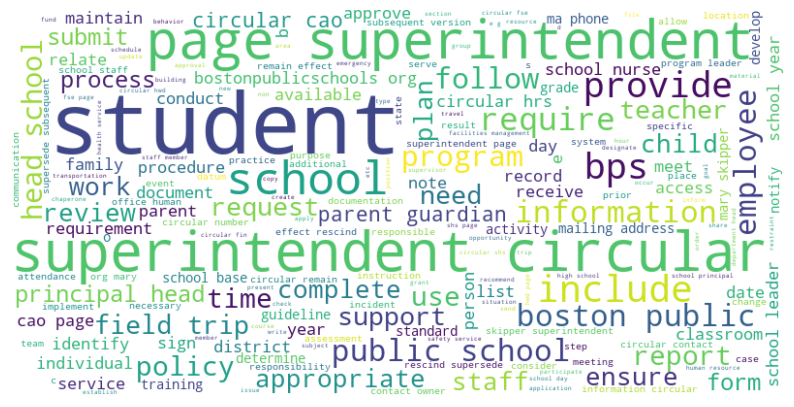

Applying LDA for topic clustering...
Topic 1: 0.028*"school" + 0.017*"page" + 0.012*"student" + 0.012*"circular" + 0.011*"superintendent"
Topic 2: 0.018*"page" + 0.012*"school" + 0.012*"superintendent" + 0.011*"circular" + 0.011*"evaluation"
Topic 3: 0.028*"school" + 0.020*"student" + 0.016*"page" + 0.011*"circular" + 0.010*"superintendent"
Topic 4: 0.031*"school" + 0.024*"student" + 0.019*"page" + 0.011*"circular" + 0.011*"superintendent"
Topic 5: 0.030*"school" + 0.027*"student" + 0.016*"page" + 0.012*"circular" + 0.012*"superintendent"


In [89]:


# Main function to process all files and analyze
def main(directory_path, merged_corpus_path):
    # Load all text files from the directory
    texts = load_all_text_files(directory_path)

    merged_tokenized_corpus = load_text_file(merged_corpus_path)

    tokens = merged_tokenized_corpus.split()

    print(f"Total number of words after tokenization and lemmatization: {len(tokens)}")

    # Word count analysis
    word_freq_df = word_count_analysis(tokens)

    # Plot the histogram for top 10 words
    plot_word_histogram(word_freq_df)

    # Plot the histogram for word count in each file
    plot_word_count_histogram(texts)

    # TF-IDF analysis (Note: For TF-IDF, we treat the entire document as one corpus here)
    tfidf_df = calculate_tfidf([merged_tokenized_corpus])  # Treat the text as a single document
    print("\nTF-IDF Scores (Top 10 words):")
    print(tfidf_df.T.nlargest(10, 0))  # Print top 10 words with highest TF-IDF scores


    # Count total number of files
    total_files = len(texts)
    print(f"Total number of files: {total_files}")

    # Calculate average word count
    total_word_count = len(merged_tokenized_corpus)
    average_word_count = total_word_count / total_files if total_files > 0 else 0
    print(f"Average word count per file: {average_word_count}")


    print("Generating Word Cloud...")
    plot_word_cloud(merged_tokenized_corpus)

    # Apply LDA for topic modeling
    print("Applying LDA for topic clustering...")
    apply_lda(texts)

# Example usage
directory_path = '../data/data_txt'
merged_corpus_path = "../data/data_txt/tokenized_data/tokenized_text.txt"  
main(directory_path, merged_corpus_path)


With this we conclude our EDA phase. 